# Importing Libaries

In [1]:
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor # Importing ensemble methods from scikit-learn 
from sklearn.preprocessing import StandardScaler # Preprocessing module for feature scaling
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_predict #for model selection
from xgboost import XGBRegressor# Importing ensemble methods
import lightgbm as lgb # LightGBM for gradient boosting framework 
import numpy as np # for working with numerical data
import plotly.graph_objects as go #for visualization
from sklearn.metrics import mean_squared_error, r2_score # Metrics module to evaluate the prediction error and performance
import os #provides functions for interacting with the operating system.
import sys #It lets us access system-specific parameters and functions
import logging #track events that happen when some software runs
from tqdm import tqdm #creat progress bars

In [ ]:
from google.colab import files # Import files module from google.colab
uploaded = files.upload()

In [2]:
df = pd.read_csv('Energy_consumption.csv') # Load a CSV file
df.head(7) ## Display the first 7 rows 

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
5,2022-01-01 05:00:00,29.576037,36.824263,1871.709180,6,Off,Off,17.626690,Sunday,Yes,84.321885
6,2022-01-01 06:00:00,25.131167,35.709622,1607.001228,6,On,Off,24.264702,Friday,Yes,76.165791


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], utc=True, infer_datetime_format=True) # Convert the 'Timestamp' column to datetime objects
df = df.set_index('Timestamp') # Set the 'Timestamp' column as the index of the DataFrame
df.head(5)

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00+00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00+00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00+00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00+00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00+00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [4]:
df.isnull().sum() #check the number of missing (NaN) values

Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [5]:
df.dtypes #display the data types of each column

Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
DayOfWeek             object
Holiday               object
EnergyConsumption    float64
dtype: object

In [6]:
def plot_series(data, column=None, series=None, label=None, ylabel=None, title=None, start=0, end=None):
    sns.set() # # Set the seaborn style
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.set_xlabel('Time', fontsize=12) #Set the label for the x-axis
    
    if column:  # Checks If 'column' parameter is provided, plot data from DataFrame
        ax.plot(data.index[start:end], data[column][start:end], label=label)
    elif series is not None:
        ax.plot(series.index[start:end], series[start:end], label=label)
        
    ax.set_ylabel(ylabel, fontsize=12) # Set the label for the y-axis
    
    if label:
        ax.legend(fontsize=10)
        
    if title:# Set the title if provided
        ax.set_title(title, fontsize=12)
        
    ax.grid(True)
    return ax #reurn to displaying the plot


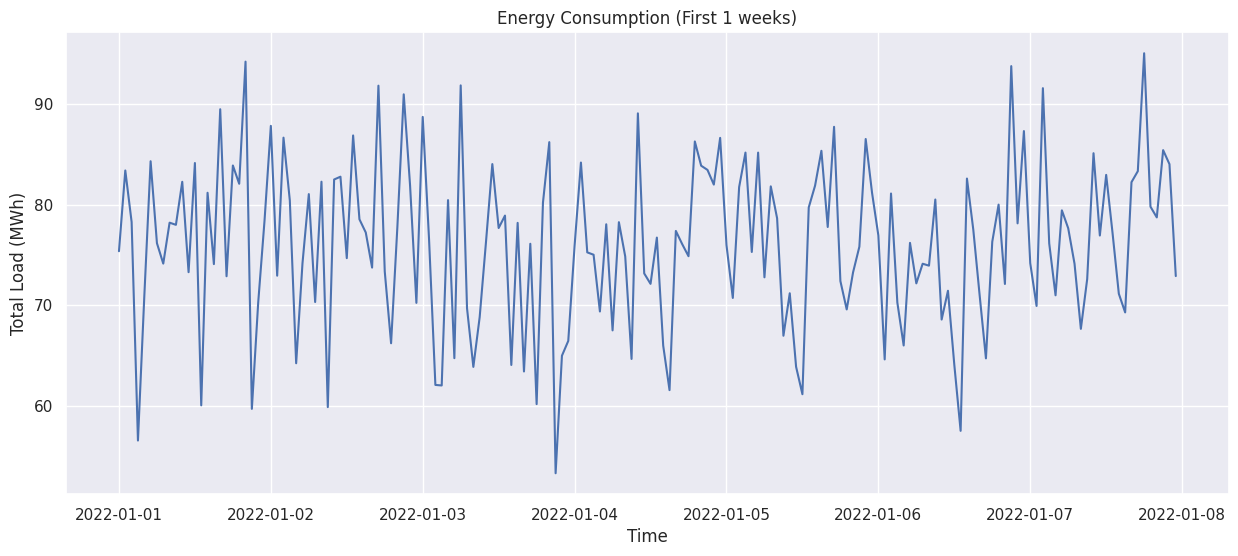

In [8]:
#plot energy used in the first week
ax = plot_series(df, column='EnergyConsumption', ylabel='Total Load (MWh)', title='Energy Consumption (First 1 week)', end=24*7)
plt.show()

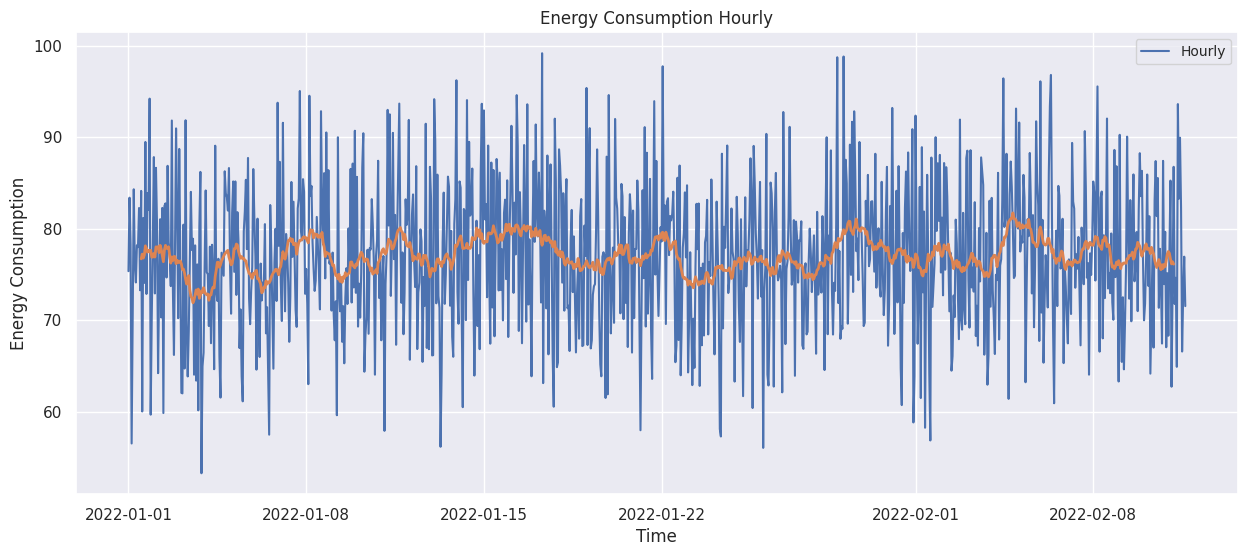

In [9]:
rolling = df['EnergyConsumption'].rolling(24, center=True).mean()#Calculate the mean of energy consumption
ax = plot_series(df, 'EnergyConsumption', label='Hourly', ylabel='Energy Consumption', title='Energy Consumption Hourly')
ax.plot(rolling.index, rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show() # Plot hourly energy consumption

In [10]:
category = df.select_dtypes(include="object") #select columns based on their data types

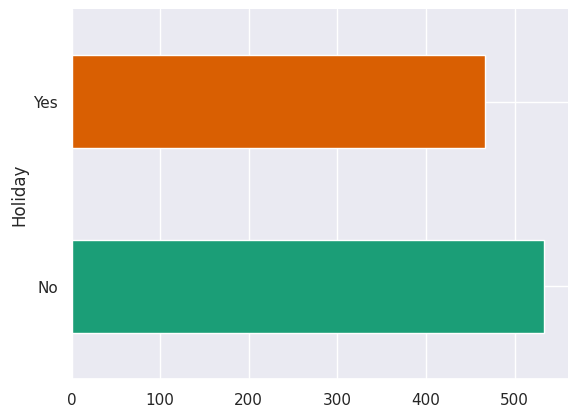

In [11]:
# @title Holiday
category.groupby('Holiday').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))# Group the data by the 'Holiday' column and calculate the size of each group,
plt.gca().spines[['top', 'right',]].set_visible(False)

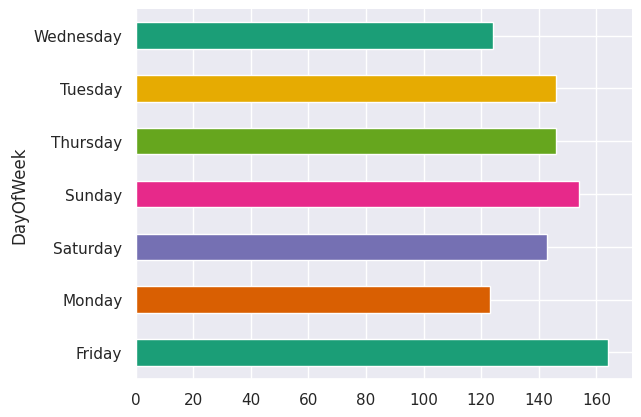

In [12]:
# @title DayOfWeek
category.groupby('DayOfWeek').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')) #count the occurrences of each category in the 'DayOfWeek
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
#a box plot to visualize the distribution of energy consumption
fig = go.Figure()
fig.add_trace(go.Box(x=df["EnergyConsumption"], 
                     boxmean='sd',
                     marker_color='rgb(255,140,0)',  
                     line_color='rgb(255,140,0)',    
                     fillcolor='rgba(255,140,0,0.5)')) 

fig.update_layout(template="plotly_white", width=1000, height=300)  # Use bright template
fig.show()

In [14]:
df = pd.get_dummies(df) #convert categorical variables into dummy

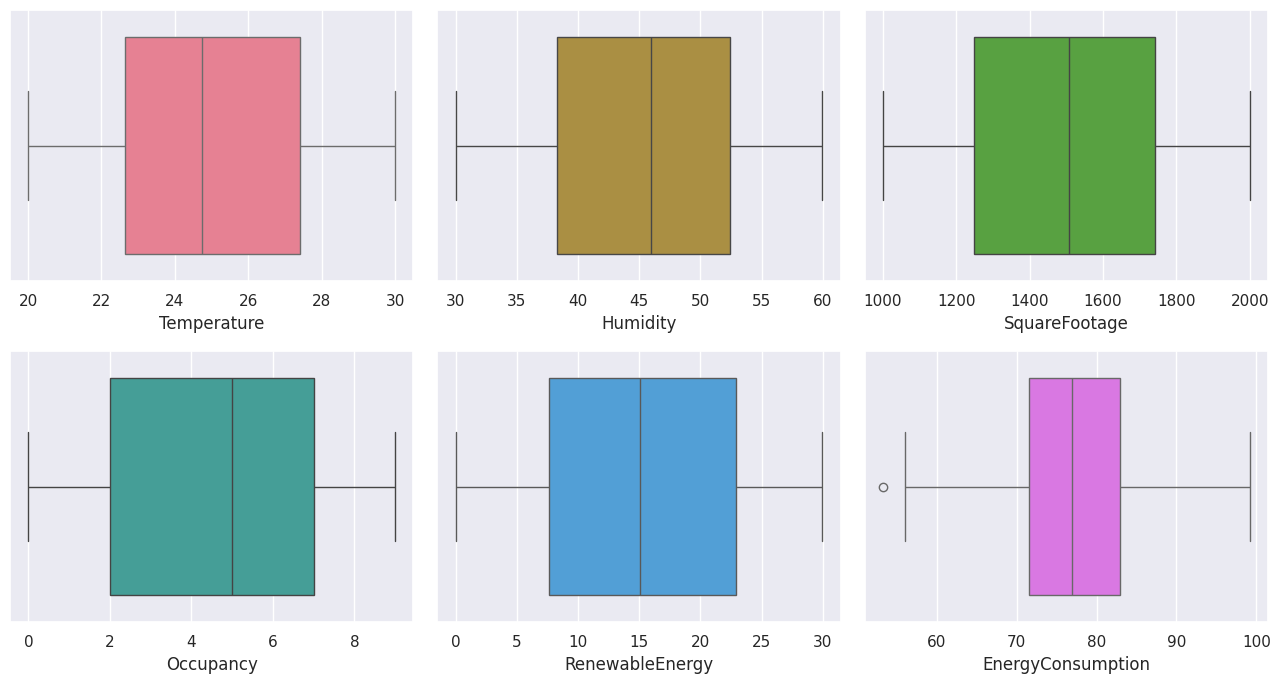

In [15]:
def custom_boxplot(data, columns):
    fig, axes = plt.subplots(2, 3, figsize=(13, 7)) # # Create a figure with 2 rows and 3 columns 

    # Define a custom color palette
    colors = sns.color_palette("husl", len(columns))
    
 # Iterate over each column in the list 'columns'
    for i, column in enumerate(columns): 
        sns.boxplot(x=data[column], ax=axes[i//3, i%3], color=colors[i])
        axes[i//3, i%3].set_xlabel(column)

    plt.tight_layout()
    plt.show()
# List of columns to plot
columns = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy', 'EnergyConsumption']
custom_boxplot(df, columns)


## Outlier removal

In [16]:
def total_outliers(column):
    column_df = pd.DataFrame(column)
    q1 = column.quantile(0.25)# Calculate the first quartile (Q1)
    q3 = column.quantile(0.75) # Calculate the third quartile (Q3)
    IQR = q3 - q1 # Calculate the interquartile range (IQR)
    outliers1 = column_df[(column_df<(q1-1.5*IQR)) | (column_df>(q3+1.5*IQR))] # Find outliers
    hasil = outliers1.count()
    return hasil  # Return the no of outliers


In [17]:
total_outliers(df['EnergyConsumption']) #no of outliers


EnergyConsumption    1
dtype: int64

In [18]:
df.drop(df[df['EnergyConsumption'] == df['EnergyConsumption'].min()].index, axis=0, inplace=True) #dropping the outlier

# Feature Engineering

In [20]:
#creates a new column named 'Temperature*Humidity'
df['Temperature*Humidity'] = df['Temperature'] * df['Humidity']

In [21]:
#ratio of renewable energy to total energy consumption
df['RenewableEnergyRatio'] = df['RenewableEnergy'] / df['EnergyConsumption']

In [22]:
#Combine the "HVACUsage_Off" and "HVACUsage_On" columns to get the total HVAC usage.
df['Total_HVAC_Usage'] = df['HVACUsage_Off'] + df['HVACUsage_On']
#Total Lighting Usage
df['Total_Lighting_Usage'] = df['LightingUsage_Off'] + df['LightingUsage_On'] 
#Divide occupancy by square footage to get occupancy density
df['Occupancy_Density'] = df['Occupancy'] / df['SquareFootage']


In [23]:
df.dtypes

Temperature             float64
Humidity                float64
SquareFootage           float64
Occupancy                 int64
RenewableEnergy         float64
EnergyConsumption       float64
HVACUsage_Off             uint8
HVACUsage_On              uint8
LightingUsage_Off         uint8
LightingUsage_On          uint8
DayOfWeek_Friday          uint8
DayOfWeek_Monday          uint8
DayOfWeek_Saturday        uint8
DayOfWeek_Sunday          uint8
DayOfWeek_Thursday        uint8
DayOfWeek_Tuesday         uint8
DayOfWeek_Wednesday       uint8
Holiday_No                uint8
Holiday_Yes               uint8
Temperature*Humidity    float64
RenewableEnergyRatio    float64
Total_HVAC_Usage          uint8
Total_Lighting_Usage      uint8
Occupancy_Density       float64
dtype: object

In [24]:
df = df.reset_index(drop=True) # resets the old index column

In [26]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns # Select numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols]) #standardizes the numerical columns

In [27]:
X,y = df.drop(['EnergyConsumption'], axis =1), df['EnergyConsumption'] #splits the DataFrame to x which is feature variables and y he arget variable 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42) #X_train feature for training. X_test feature for testing

In [29]:
logging.getLogger('lightgbm').setLevel(logging.ERROR) # Suppress all logging messages 

# Redirect stdout and stderr to /dev/null to suppress all console output
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

# Building Base Model without Tuning.

In [30]:
# Create instances of each model
xgb_model = XGBRegressor()
extra_trees_model = ExtraTreesRegressor()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
lgb_model = lgb.LGBMRegressor()

In [31]:
#Training machine learning models
xgb_model.fit(X_train, y_train)
extra_trees_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)

#making Prediction
xgb_preds = xgb_model.predict(X_test)
extra_trees_preds = extra_trees_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
lgb_preds = lgb_model.predict(X_test)

## Evaluation

In [32]:

# Calculate Mean square Error MSE.MSE measures the average squared difference between the predicted and the actual target values  
mse_values = {
    'Model': ['XGBoost', 'Extra Trees', 'Random Forest', 'Gradient Boosting', 'LightGBM'],
    'MSE': [
        mean_squared_error(y_test, xgb_preds),
        mean_squared_error(y_test, extra_trees_preds),
        mean_squared_error(y_test, rf_preds),
        mean_squared_error(y_test, gb_preds),
        mean_squared_error(y_test, lgb_preds)
    ]
}

mse_df = pd.DataFrame(mse_values)
mse_df

,Model,MSE
0,XGBoost,0.342874
1,Extra Trees,0.487687
2,Random Forest,0.430201
3,Gradient Boosting,0.311872
4,LightGBM,0.260408


In [33]:
ensemble_preds = np.column_stack((xgb_preds, extra_trees_preds, rf_preds, gb_preds, lgb_preds))#tack predictions from various ensemble models

In [34]:
ensemble_mean_preds = ensemble_preds.mean(axis=1)# calculate the mean of the predictions made by multiple ensemble models

In [35]:
# Calculate Mean square Error MSE.
ensemble_mse = mean_squared_error(y_test, ensemble_mean_preds)
ensemble_r2 = r2_score(y_test, ensemble_mean_preds)
# Createing a DataFrame
ensemble_metrics = {
    'Metric': ['MSE','R-squared'],
    'Value': [ensemble_mse, ensemble_r2]
}
ensemble = pd.DataFrame(ensemble_metrics)
ensemble

,Metric,Value
0,MSE,0.331640
1,R-squared,0.646468


# Hyperparameter tuning

In [36]:
base_models = [
    XGBRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    lgb.LGBMRegressor()
 
]

In [37]:

# Defining the hyperparameter grids for each model
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1]
}

extra_trees_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [38]:
# Creating base models
base_models = [
    XGBRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    lgb.LGBMRegressor()
]

# Creating a list of base models with their corresponding hyperparameter grids
base_models_with_grids = [
    (XGBRegressor(), xgb_param_grid),
    (ExtraTreesRegressor(), extra_trees_param_grid),
    (RandomForestRegressor(), rf_param_grid),
    (GradientBoostingRegressor(), gb_param_grid),
    (lgb.LGBMRegressor(), lgb_param_grid)
]

## Ensemble Model Building

In [39]:
#tuning multiple base models using grid search
tuned_base_models = []
base_models_grid_search = []
for model, param_grid in base_models_with_grids:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train) #fits several models,
    tuned_base_models.append(grid_search.best_estimator_)
    base_models_grid_search.append(grid_search)


base_predictions = np.zeros((X_train.shape[0], len(tuned_base_models)))

In [43]:
# Using cross-validation to obtain out-of-fold predictions from the tuned base models
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for i, model in enumerate(tuned_base_models):
    base_predictions[:, i] = cross_val_predict(model, X_train, y_train, cv=kf)

# Combining the original features with the base model predictions
stacked_X_train = np.column_stack([X_train, base_predictions])

# Defining the hyperparameter grid for the meta-model
meta_param_grid = {
    'n_estimators': [100, 200, 300,600],
    'max_depth': [3, 5, 7,10,15],
    'max_features': ['sqrt', 'log2']
}

# Performing grid search for the meta-model(our new model)
meta_model = RandomForestRegressor()
grid_search = GridSearchCV(meta_model, meta_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(stacked_X_train, y_train)
tuned_meta_model = grid_search.best_estimator_

# Making predictions on the test set 
base_predictions_test = np.column_stack([model.predict(X_test) for model in tuned_base_models])
stacked_X_test = np.column_stack([X_test, base_predictions_test])
meta_preds = tuned_meta_model.predict(stacked_X_test)


### Evaluating the performance of the stacked model

In [44]:
ensemble_mse = mean_squared_error(y_test, meta_preds)
ensemble_r2 = r2_score(y_test, meta_preds)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, meta_preds))

print(f"Ensemble MSE: {ensemble_mse:.4f}")
print(f"Ensemble R-squared: {ensemble_r2:.4f}")
print(f"Ensemble RMSE: {ensemble_rmse:.4f}")

In [42]:

# Creating DataFrame for performance
ensemble_metrics = {
    'Metric': ['MSE', 'R2','RMSE'],
    'Value': [ensemble_mse, ensemble_r2,ensemble_rmse]
}
ensemble_df = pd.DataFrame(ensemble_metrics)
ensemble_df

,Metric,Value
0,MSE,0.255326
1,R2,0.727819
2,RMSE,0.505298
